# Stock Forecasting using ARIMA Model (Time-Series Analysis)
#One year price: S&P 500

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_predict
from pylab import rcParams

In [2]:
#Loading Data fro Yahoo Finance
data=yf.download("^GSPC", start="2022-01-01", end="2023-01-31")

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03 00:00:00-05:00,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000
2022-01-04 00:00:00-05:00,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000
2022-01-05 00:00:00-05:00,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000
2022-01-06 00:00:00-05:00,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000
2022-01-07 00:00:00-05:00,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000


In [4]:
#Removing the time from index and set the period
data.index = data.index.values.astype('M8[D]')

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,4796.560059,3831020000
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4793.540039,4683170000
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4700.580078,4887960000
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4696.049805,4295280000
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4677.029785,4181510000


In [6]:
#Dropping the Adj Close value
data.drop("Adj Close", inplace=True, axis=1)
data.head(5)

,Open,High,Low,Close,Volume
2022-01-03,4778.140137,4796.640137,4758.169922,4796.560059,3831020000
2022-01-04,4804.509766,4818.620117,4774.270020,4793.540039,4683170000
2022-01-05,4787.990234,4797.700195,4699.439941,4700.580078,4887960000
2022-01-06,4693.390137,4725.009766,4671.259766,4696.049805,4295280000
2022-01-07,4697.660156,4707.950195,4662.740234,4677.029785,4181510000


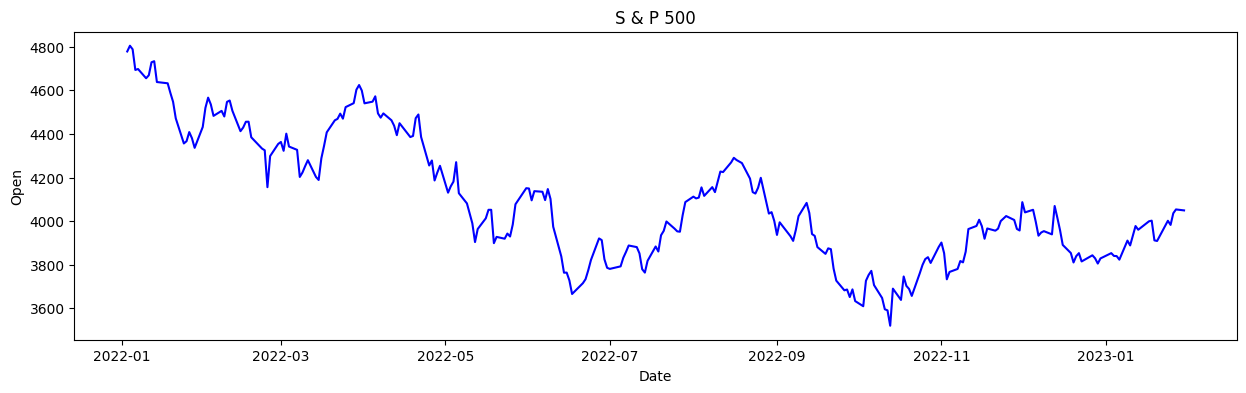

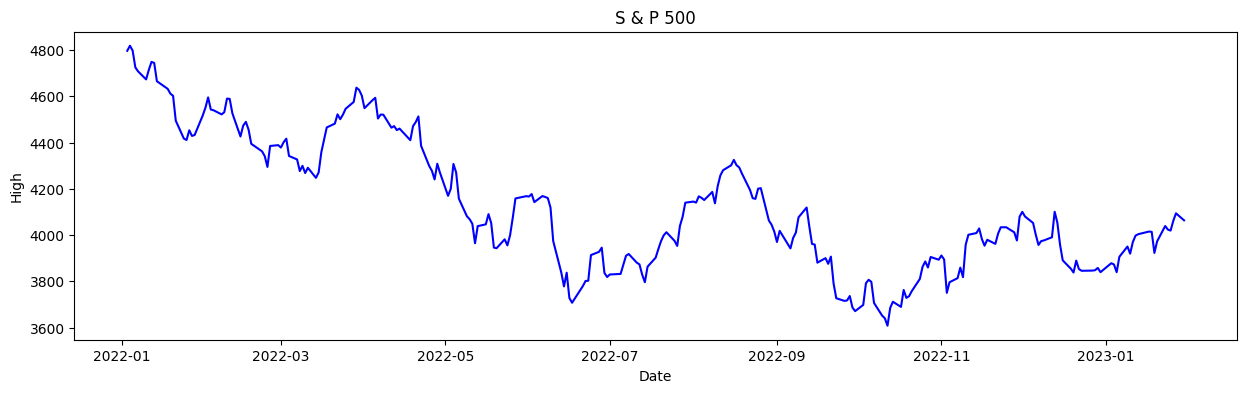

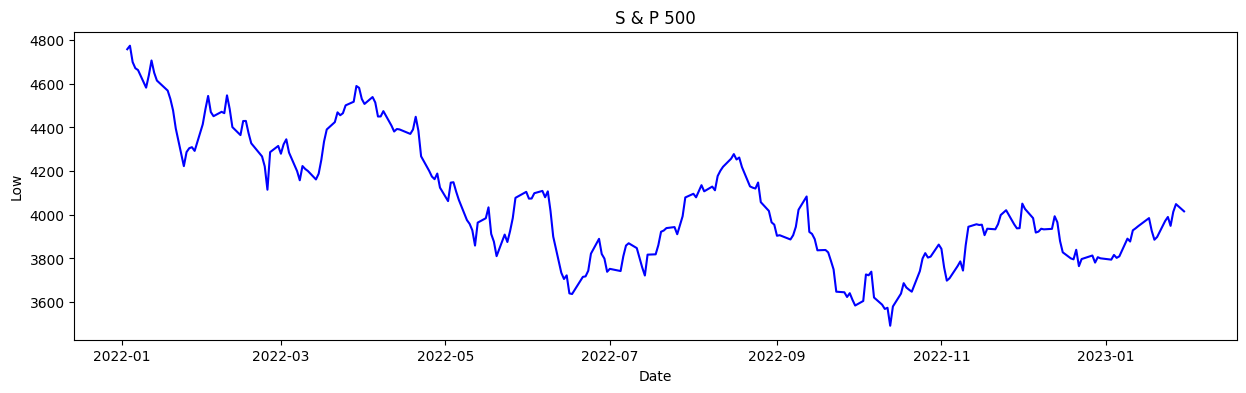

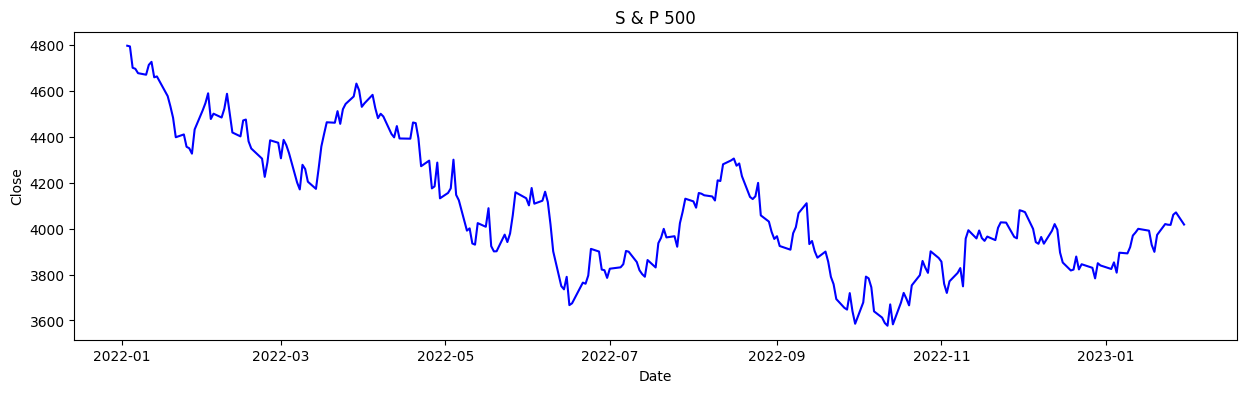

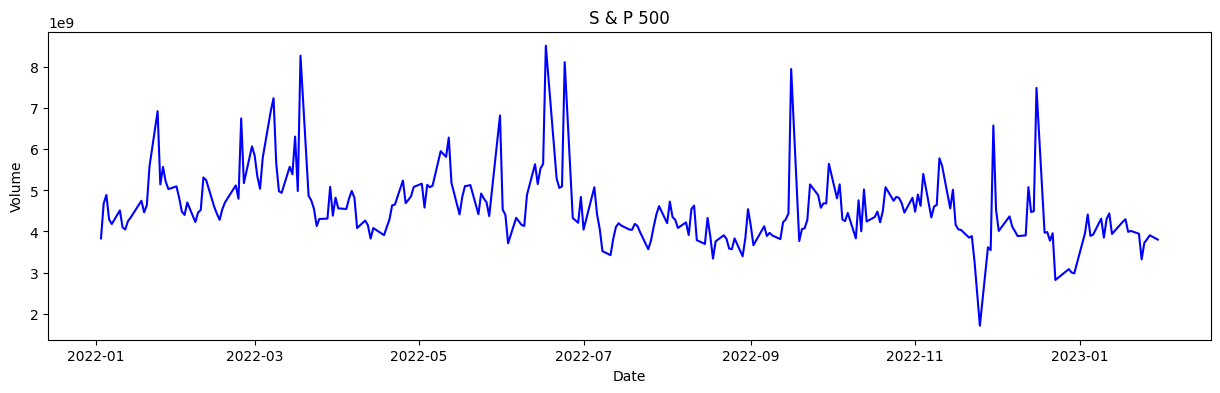

In [7]:
#Plotting the values
def plot_df(df, x, y, clr="", ylabel="",title="S & P 500", xlabel='Date', dpi=100, ):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color=clr)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

for title in data.columns:
    plot_df(data, x=data.index, y=data[title], clr="blue", ylabel=title)

# Working with Open Price

# STATIONARITY Check




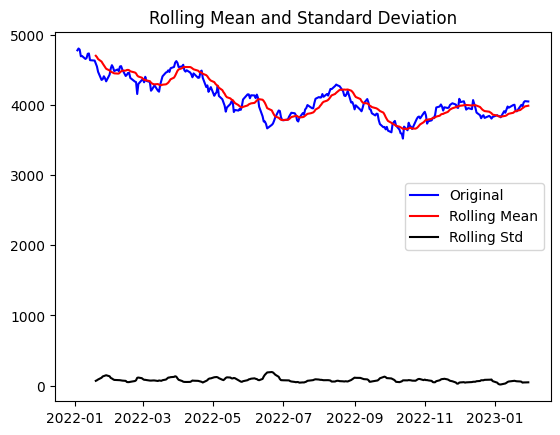

Results of dickey fuller test
Test Statistics                 -2.528371
p-value                          0.108723
No. of lags used                 0.000000
Number of observations used    269.000000
critical value (1%)             -3.454896
critical value (5%)             -2.872345
critical value (10%)            -2.572528
dtype: float64
Data is non-stationary 


In [8]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    if output[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary ")
test_stationarity(data['Open'])

<Figure size 640x480 with 0 Axes>

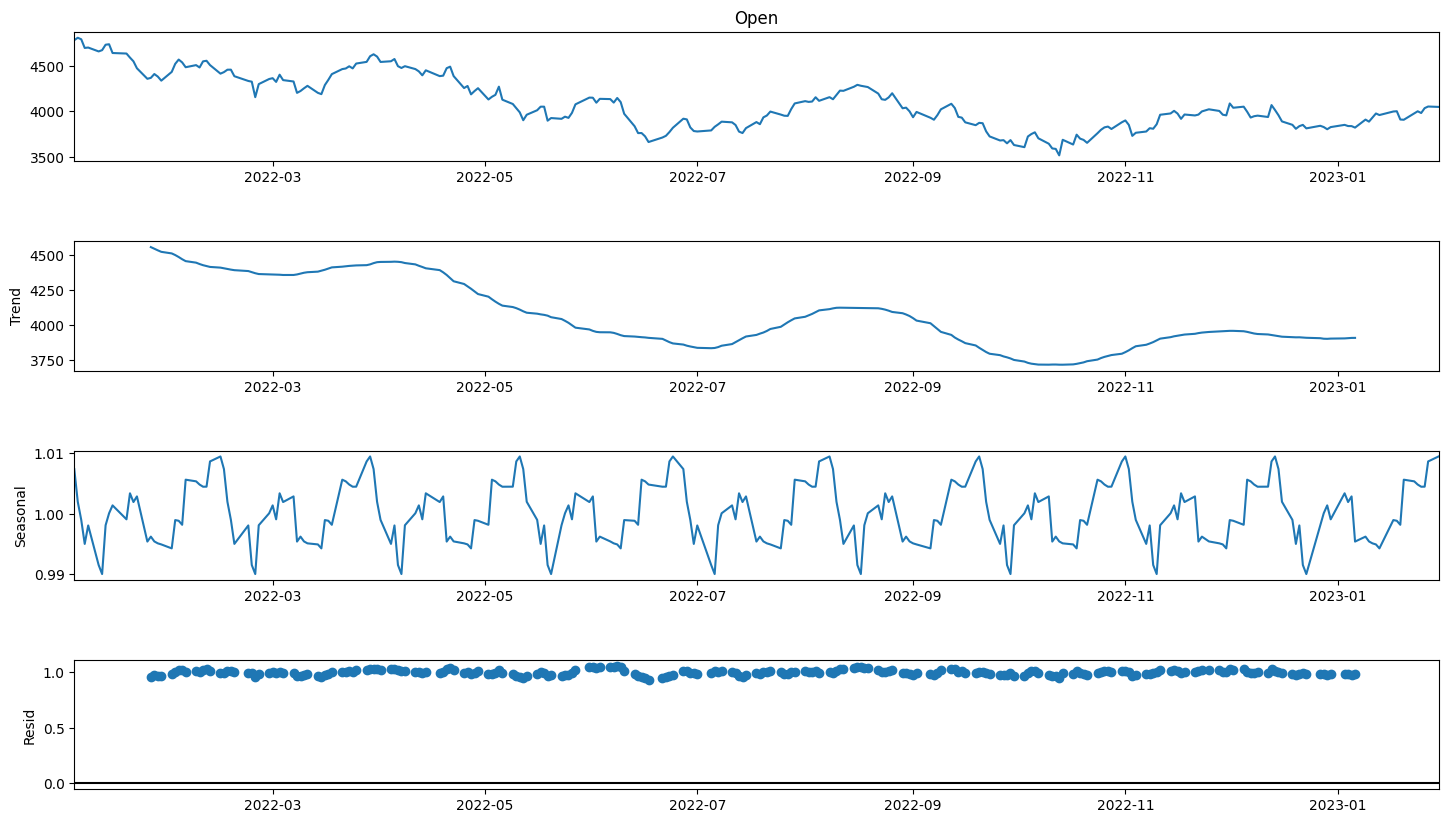

In [9]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(data['Open'], model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


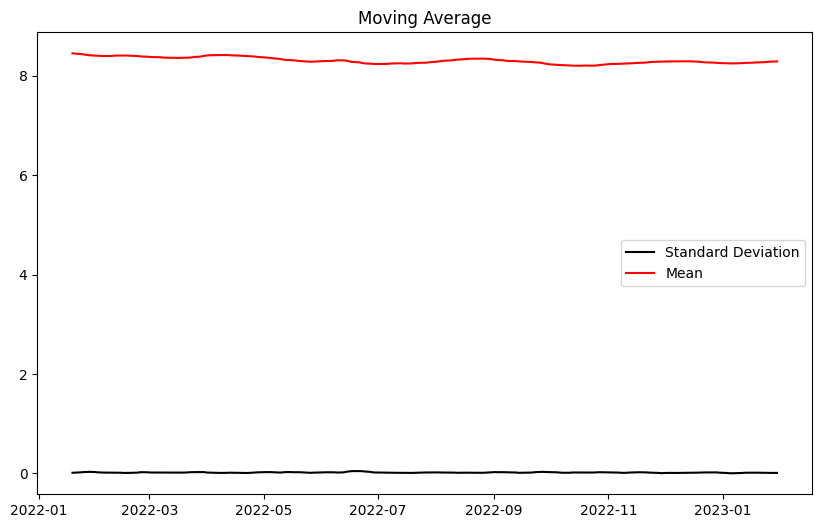

In [10]:
#if not stationary then eliminate trend
#Eliminate trend
rcParams['figure.figsize'] = 10, 6
#Log conversion
df_log = np.log(data['Open'])

moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

# USING AUTO ARIMA to decide-> p, q, and d

In [11]:
train_data=df_log

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1533.704, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1532.584, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1532.576, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1535.176, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1530.582, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.338 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  270
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 768.588
Date:                Wed, 08 Feb 2023   AIC                          -1535.176
Time:                        09:15:38   BIC                          -1531.582
Sample:                             0   HQIC                         -1533.733
                                - 270                                  

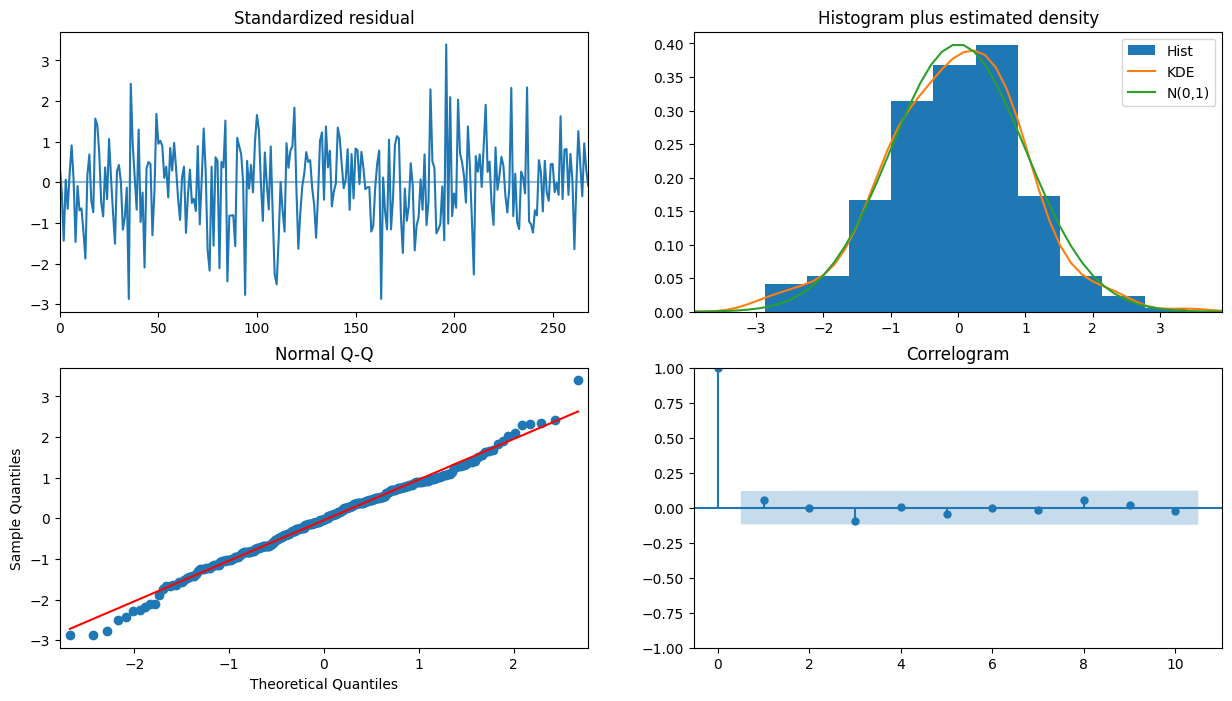

In [12]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [13]:
#Modeling ARIMA
# Build Model
model = ARIMA(train_data, order=(0,1,0))  
ARIMA_res = model.fit()  
print(ARIMA_res.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  270
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 768.588
Date:                Wed, 08 Feb 2023   AIC                          -1535.176
Time:                        09:15:39   BIC                          -1531.582
Sample:                             0   HQIC                         -1533.733
                                - 270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002    1.5e-05     12.878      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.89   Jarque-Bera (JB):                 2.63
Prob(Q):                              0.35   Pr

c:\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
#ARIMA Prediction
arima_fcast=ARIMA_res.predict(n_periods=542, return_conf_int=True, alpha=0.05)

In [15]:
predict_arima=np.exp(arima_fcast.dropna())

In [16]:
predict_arima=predict_arima.drop('2022-01-03')
predict_arima.head(10)

2022-01-04    4778.140137
2022-01-05    4804.509766
2022-01-06    4787.990227
2022-01-07    4693.390137
2022-01-10    4697.660156
2022-01-11    4655.339844
2022-01-12    4669.140137
2022-01-13    4728.589844
2022-01-14    4733.560059
2022-01-18    4637.990234
Name: predicted_mean, dtype: float64

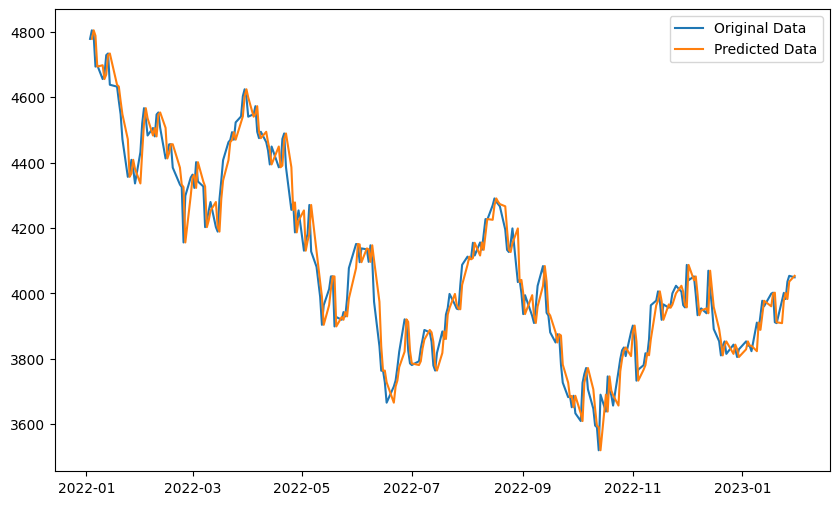

In [17]:
plt.plot(data['Open'], label='Original Data')
plt.plot(predict_arima, label='Predicted Data')
plt.legend(loc='best')
plt.show()

c:\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


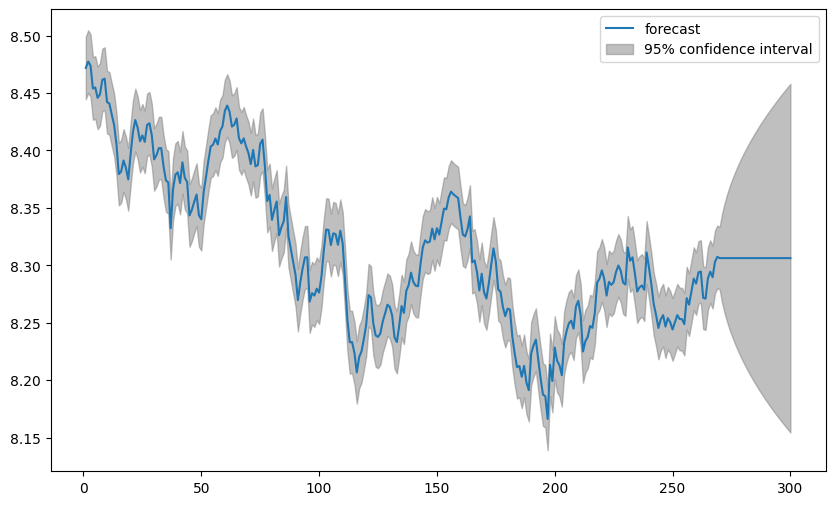

In [18]:
#ARIMA Forecasting
plot_predict(ARIMA_res, 1, 300)
plt.show()

In [19]:
#Forecasting (Open Price)
np.exp(ARIMA_res.forecast(steps=20))

c:\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


270    4049.27002
271    4049.27002
272    4049.27002
273    4049.27002
274    4049.27002
275    4049.27002
276    4049.27002
277    4049.27002
278    4049.27002
279    4049.27002
280    4049.27002
281    4049.27002
282    4049.27002
283    4049.27002
284    4049.27002
285    4049.27002
286    4049.27002
287    4049.27002
288    4049.27002
289    4049.27002
Name: predicted_mean, dtype: float64

# Closing Price

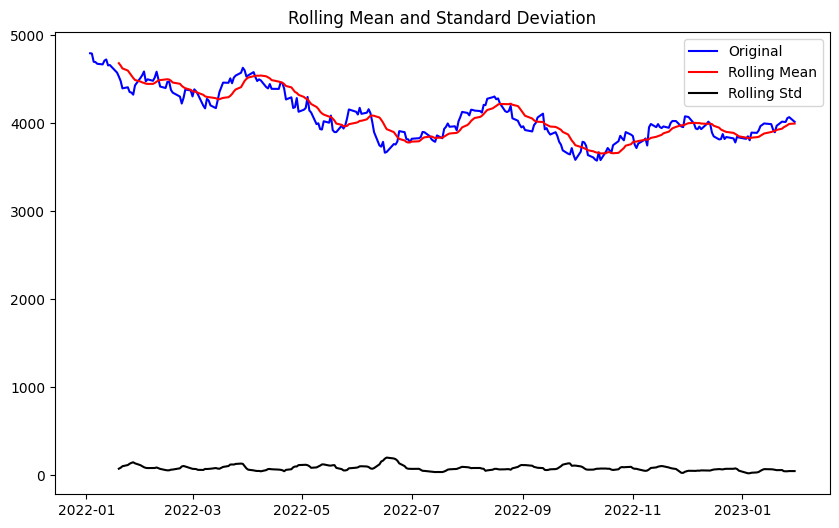

Results of dickey fuller test
Test Statistics                 -2.652761
p-value                          0.082575
No. of lags used                 0.000000
Number of observations used    269.000000
critical value (1%)             -3.454896
critical value (5%)             -2.872345
critical value (10%)            -2.572528
dtype: float64
Data is non-stationary 


In [20]:
#Stionarity check
test_stationarity(data['Close'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


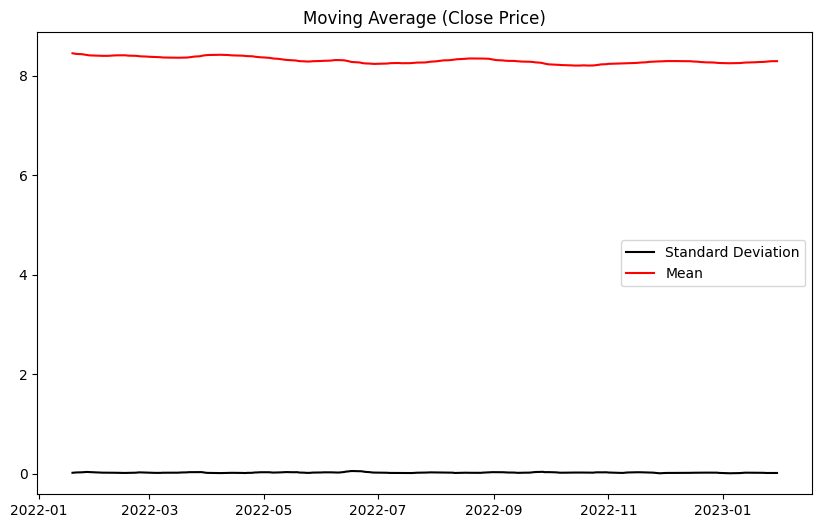

In [21]:
#Removing Tends and seasonal decomposition
df_cl_log = np.log(data['Close'])

moving_avg = df_cl_log.rolling(12).mean()
std_dev = df_cl_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average (Close Price)')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend(loc="best")
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1493.760, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1491.772, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1491.772, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1495.239, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1490.004, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.452 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  270
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 748.619
Date:                Wed, 08 Feb 2023   AIC                          -1495.239
Time:                        09:15:40   BIC                          -1491.644
Sample:                             0   HQIC                         -1493.795
                                - 270                                  

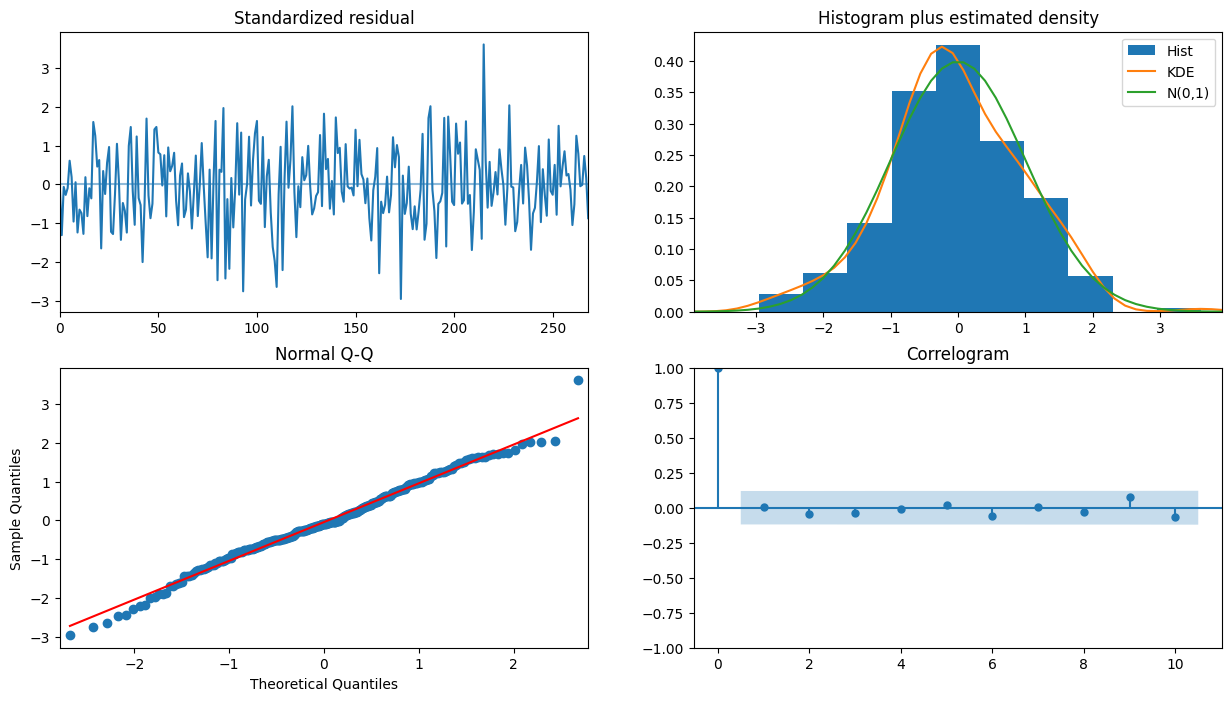

In [22]:
#Using AUTO ARIMA for Estimation
train_data=df_cl_log
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [23]:
#Modeling ARIMA
# Build Model
model = ARIMA(train_data, order=(0,1,0))  
ARIMA_res = model.fit()  
print(ARIMA_res.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  270
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 748.619
Date:                Wed, 08 Feb 2023   AIC                          -1495.239
Time:                        09:15:42   BIC                          -1491.644
Sample:                             0   HQIC                         -1493.795
                                - 270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   1.77e-05     12.655      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.63
Prob(Q):                              0.91   Pr

c:\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [24]:
#Forecasting (Open Price)
np.exp(ARIMA_res.forecast(steps=20))

c:\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


270    4017.77002
271    4017.77002
272    4017.77002
273    4017.77002
274    4017.77002
275    4017.77002
276    4017.77002
277    4017.77002
278    4017.77002
279    4017.77002
280    4017.77002
281    4017.77002
282    4017.77002
283    4017.77002
284    4017.77002
285    4017.77002
286    4017.77002
287    4017.77002
288    4017.77002
289    4017.77002
Name: predicted_mean, dtype: float64